<a href="https://colab.research.google.com/github/Kalyanasundaram12/Supply-Chain-Analysis/blob/main/Supply%20Chain%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pycountry_convert
!pip install googletrans==4.0.0-rc1

In [ ]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
import holoviews as hv
import plotly.graph_objects as go
import plotly.express as px
import pycountry_convert as pc
from googletrans import Translator
%matplotlib inline

In [ ]:
#loading the data
df = pd.read_csv("/content/drive/MyDrive/Dataset/DataCoSupplyChainDataset.csv",encoding='latin1')

In [ ]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [ ]:
#assessment the cleanliness of the data
df.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [ ]:
#dropping the duplicated and unnecessary columns
df.drop(['Category Id',"Customer Email","Product Image","Product Description","Product Category Id","Product Card Id"
         ,"Order Zipcode","Order Item Id","Order Item Cardprod Id","Benefit per order",
         "Sales per customer", "Order Customer Id","Product Price",'Customer Password']
        ,axis= 1 , inplace= True)

In [ ]:
#explore the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Delivery Status                180519 non-null  object 
 4   Late_delivery_risk             180519 non-null  int64  
 5   Category Name                  180519 non-null  object 
 6   Customer City                  180519 non-null  object 
 7   Customer Country               180519 non-null  object 
 8   Customer Fname                 180519 non-null  object 
 9   Customer Id                    180519 non-null  int64  
 10  Customer Lname                 180511 non-null  object 
 11  Customer Segment               180519 non-null  object 
 12  Customer State                

In [ ]:
# changing the columns names
df.columns = df.columns.str.replace(" ","_")
df.columns

Index(['Type', 'Days_for_shipping_(real)', 'Days_for_shipment_(scheduled)',
       'Delivery_Status', 'Late_delivery_risk', 'Category_Name',
       'Customer_City', 'Customer_Country', 'Customer_Fname', 'Customer_Id',
       'Customer_Lname', 'Customer_Segment', 'Customer_State',
       'Customer_Street', 'Customer_Zipcode', 'Department_Id',
       'Department_Name', 'Latitude', 'Longitude', 'Market', 'Order_City',
       'Order_Country', 'order_date_(DateOrders)', 'Order_Id',
       'Order_Item_Discount', 'Order_Item_Discount_Rate',
       'Order_Item_Product_Price', 'Order_Item_Profit_Ratio',
       'Order_Item_Quantity', 'Sales', 'Order_Item_Total',
       'Order_Profit_Per_Order', 'Order_Region', 'Order_State', 'Order_Status',
       'Product_Name', 'Product_Status', 'shipping_date_(DateOrders)',
       'Shipping_Mode'],
      dtype='object')

In [ ]:
#  chamging the formate of the dates columns
df["shipping_date_(DateOrders)"]= pd.to_datetime(df["shipping_date_(DateOrders)"])
df["order_date_(DateOrders)"]= pd.to_datetime(df["order_date_(DateOrders)"])

In [ ]:
#spliting the data frame into quantitative & qualitative data
df_quant = df.select_dtypes(include=['number'])
df_qual = df.select_dtypes(include=['object'])

## the correlation between the quantitative variables

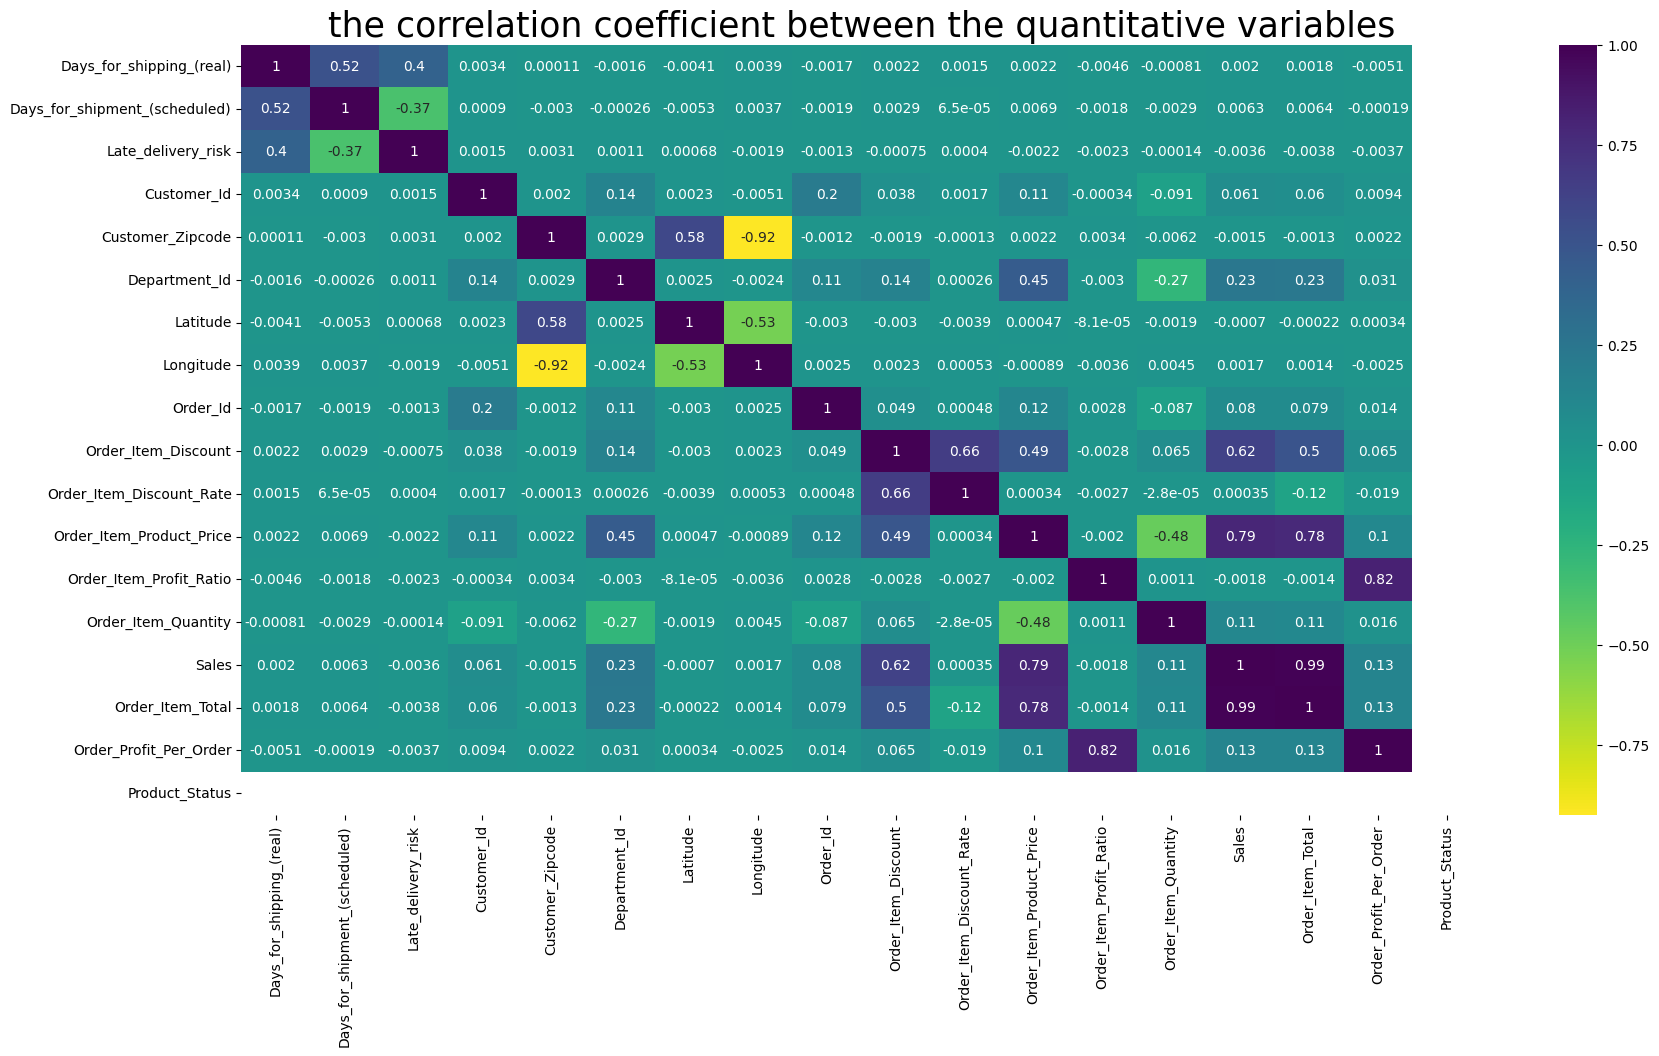

In [ ]:
#the realations between the quantitative varibles
plt.rcParams["figure.figsize"] = 20,10
sb.heatmap(df_quant.corr(),cmap='viridis_r',annot= True)
plt.title("the correlation coefficient between the quantitative variables",size = 25);

-It is clear that the increase in scheduled shipping days reduces the risk of late delivery because the correlation coefficient between scheduled shipping days and the risk of late delivery is (-0.37). that means it's better to increase the scheduled shipping date to give more opportunity to reach the shipment on time.

-Sales and the discount has a clear positive correlation (0.62)

-order item product price and item quantatity (-048) . that make us understand that the more expensive products the less quantity is ordered.


In [ ]:
#display the columns names of the quantitative variables
df_qual.columns

Index(['Type', 'Delivery_Status', 'Category_Name', 'Customer_City',
       'Customer_Country', 'Customer_Fname', 'Customer_Lname',
       'Customer_Segment', 'Customer_State', 'Customer_Street',
       'Department_Name', 'Market', 'Order_City', 'Order_Country',
       'Order_Region', 'Order_State', 'Order_Status', 'Product_Name',
       'Shipping_Mode'],
      dtype='object')

## Distribution of the categorical variables

In [ ]:
# function for counting the categorical variables on X axis
plt.rcParams["figure.figsize"] = 11,6
def categ_count_x(categ_var, title):
    sb.countplot(data = df , x = df[categ_var],order= df[categ_var].value_counts().index, palette='gist_heat')
    plt.title(title, size = 20)
    plt.show()


<ipython-input-14-953916727a17>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(data = df , x = df[categ_var],order= df[categ_var].value_counts().index, palette='gist_heat')


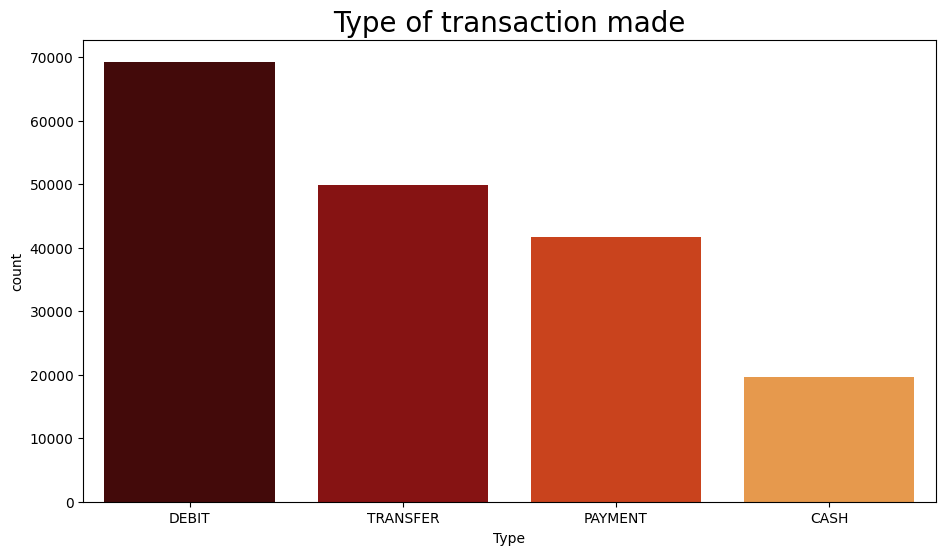

<ipython-input-14-953916727a17>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(data = df , x = df[categ_var],order= df[categ_var].value_counts().index, palette='gist_heat')


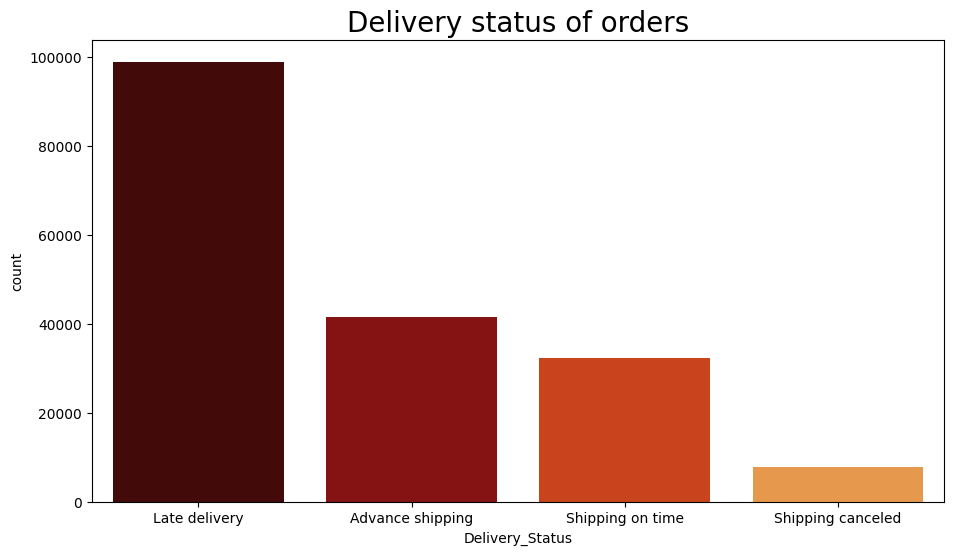

<ipython-input-14-953916727a17>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(data = df , x = df[categ_var],order= df[categ_var].value_counts().index, palette='gist_heat')


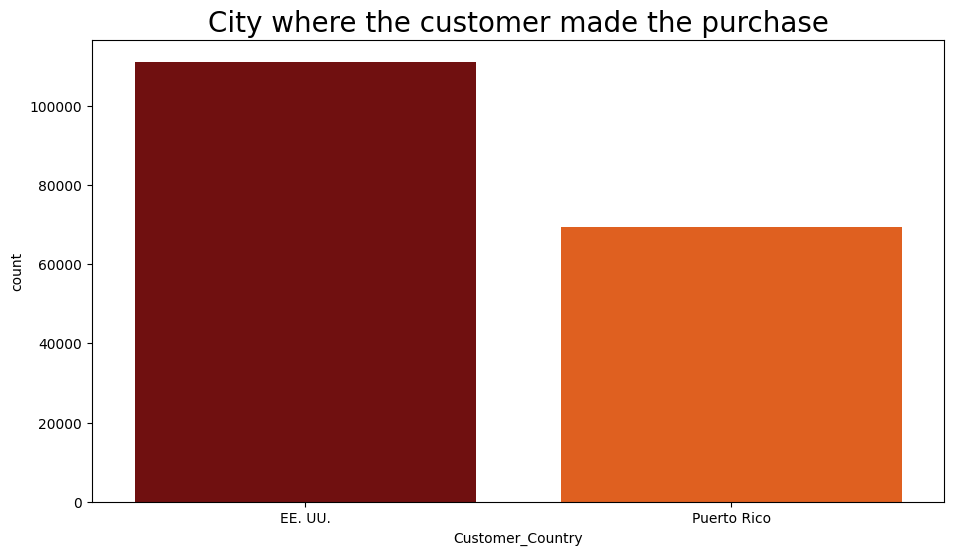

<ipython-input-14-953916727a17>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(data = df , x = df[categ_var],order= df[categ_var].value_counts().index, palette='gist_heat')


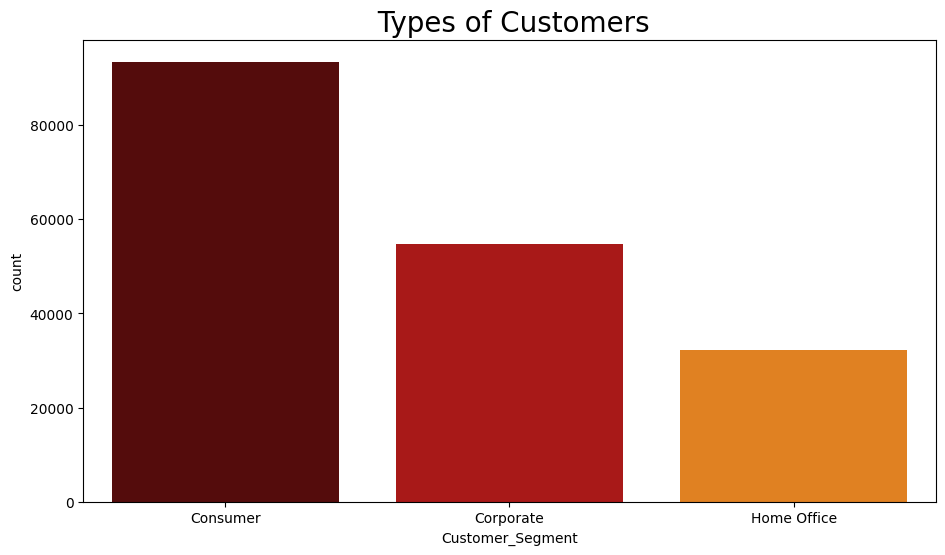

In [ ]:
categ_count_x("Type","Type of transaction made")
categ_count_x("Delivery_Status","Delivery status of orders")
categ_count_x("Customer_Country","City where the customer made the purchase")
categ_count_x("Customer_Segment"," Types of Customers")


<ipython-input-16-58ec92ab01e5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(data = df,y = df[categ_var],order= df[categ_var].value_counts().index, palette='gist_heat')


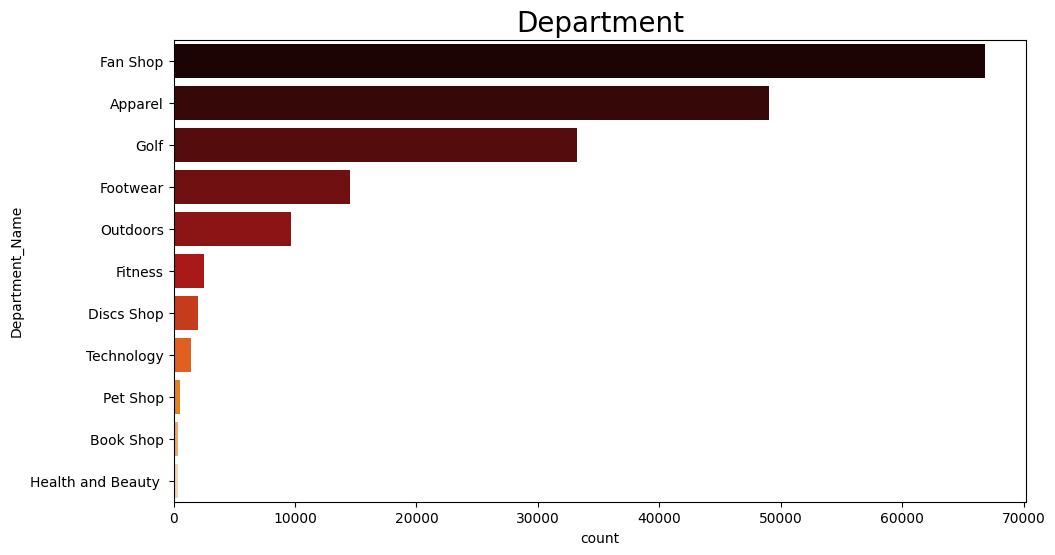

<ipython-input-16-58ec92ab01e5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(data = df,y = df[categ_var],order= df[categ_var].value_counts().index, palette='gist_heat')


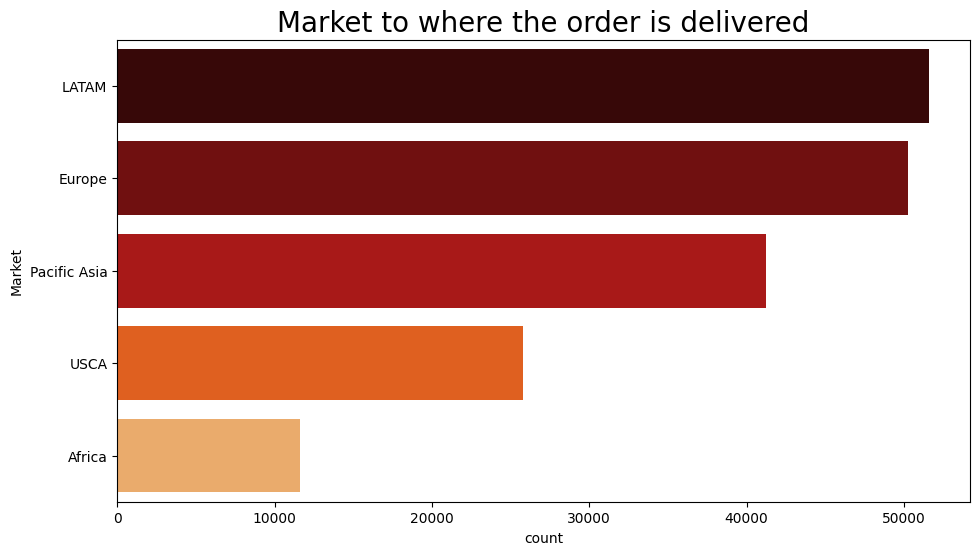

<ipython-input-16-58ec92ab01e5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(data = df,y = df[categ_var],order= df[categ_var].value_counts().index, palette='gist_heat')


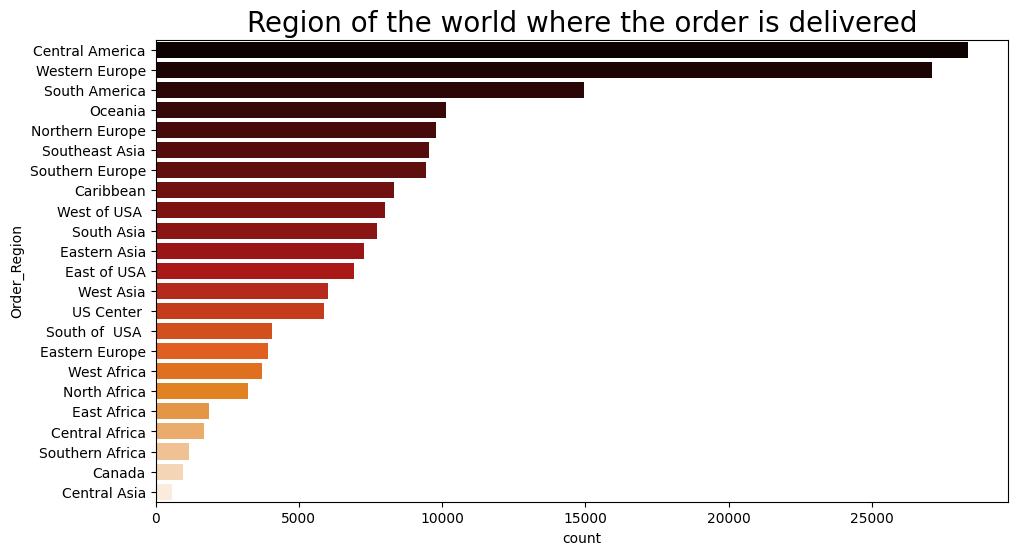

<ipython-input-16-58ec92ab01e5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(data = df,y = df[categ_var],order= df[categ_var].value_counts().index, palette='gist_heat')


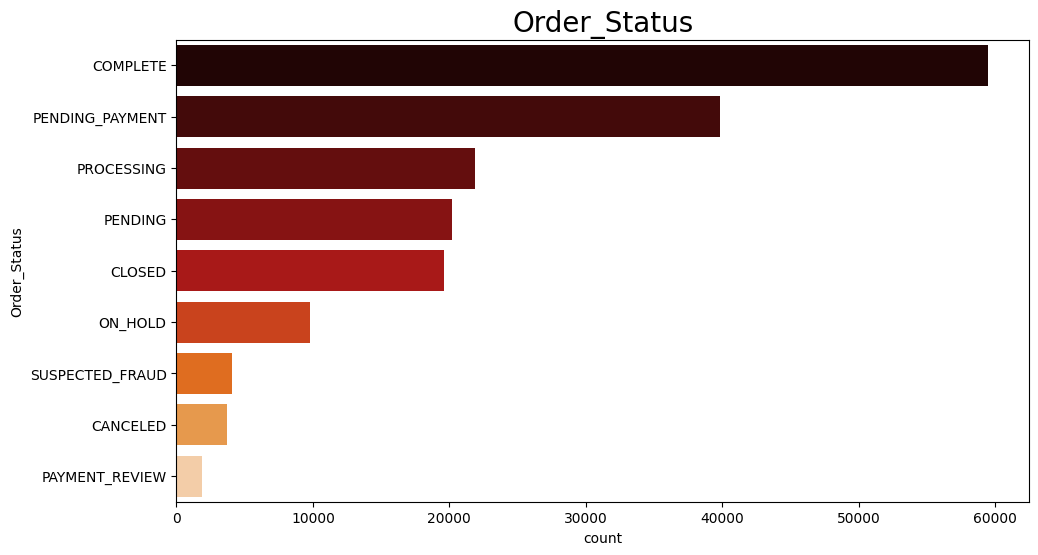

In [ ]:
# function for counting the categorical variables on Y axis
def categ_count_y(categ_var, title):
    sb.countplot(data = df,y = df[categ_var],order= df[categ_var].value_counts().index, palette='gist_heat')
    plt.title(title, size = 20)
    plt.show()


categ_count_y("Department_Name","Department")
categ_count_y("Market","Market to where the order is delivered")
categ_count_y("Order_Region","Region of the world where the order is delivered")
categ_count_y("Order_Status","Order_Status")

In [ ]:
df_quant.columns

Index(['Days_for_shipping_(real)', 'Days_for_shipment_(scheduled)',
       'Late_delivery_risk', 'Customer_Id', 'Customer_Zipcode',
       'Department_Id', 'Latitude', 'Longitude', 'Order_Id',
       'Order_Item_Discount', 'Order_Item_Discount_Rate',
       'Order_Item_Product_Price', 'Order_Item_Profit_Ratio',
       'Order_Item_Quantity', 'Sales', 'Order_Item_Total',
       'Order_Profit_Per_Order', 'Product_Status'],
      dtype='object')

In [ ]:
# function of histograme
def quant_count(num_var, title):
    sb.histplot(df[num_var] ,kde=False,color = "Green")
    plt.title(title, size = 20)
    plt.show()


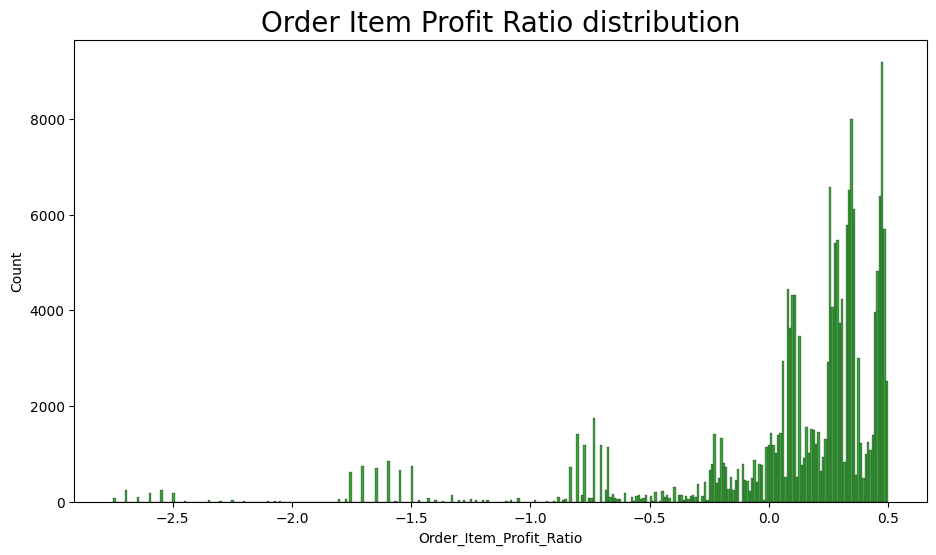

In [ ]:

quant_count("Order_Item_Profit_Ratio", "Order Item Profit Ratio distribution")

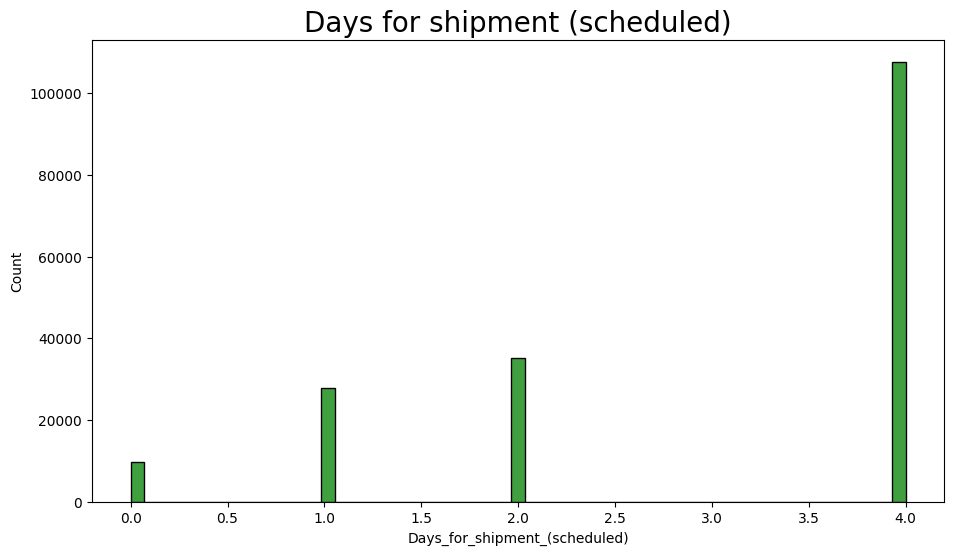

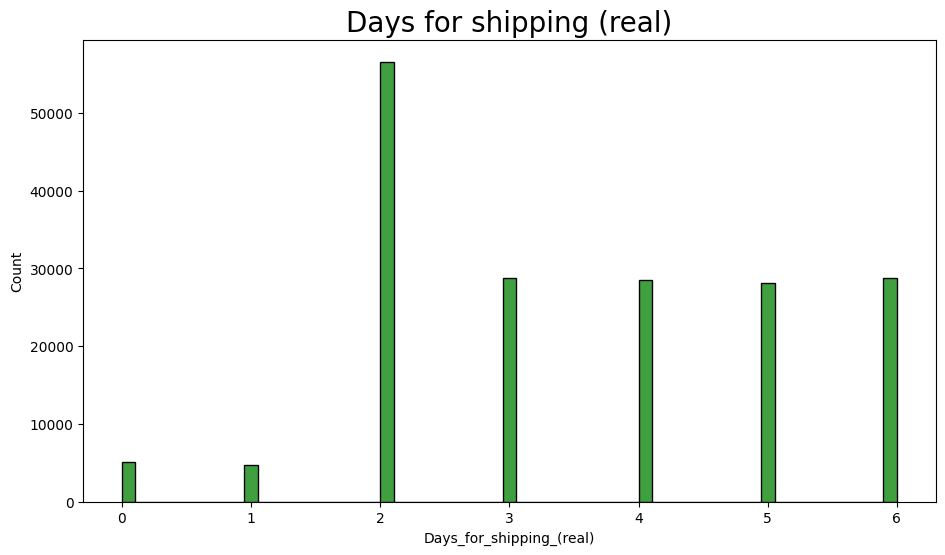

In [ ]:
quant_count("Days_for_shipment_(scheduled)", "Days for shipment (scheduled)")
quant_count("Days_for_shipping_(real)", "Days for shipping (real)")

# the analysis of the profit and the loss

In [ ]:

df["profit_or_lose"] = np.where(df.Order_Profit_Per_Order>=0,"profit","lose")

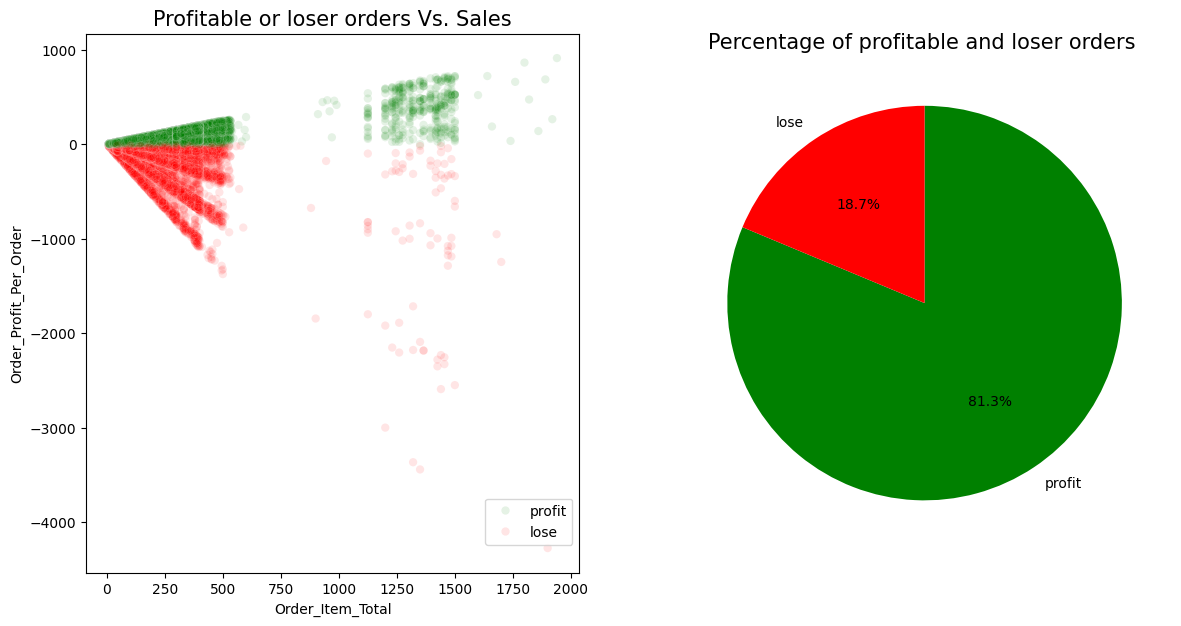

In [ ]:
plt.figure(figsize = [14, 7])
plt.subplot(1, 2, 1)
sb.scatterplot( x = df.Order_Item_Total , y = df.Order_Profit_Per_Order , hue = df["profit_or_lose"] ,
               palette= ["g", "r"], alpha = 0.1)
plt.title("Profitable or loser orders Vs. Sales",size = 15)
plt.legend(bbox_to_anchor = (1,0.15));
plt.subplot(1, 2, 2)
pie_data = df["profit_or_lose"].value_counts()
plt.pie(pie_data,labels = pie_data.index, startangle = 90, counterclock = False , autopct='%.1f%%',colors= ["g", "r"])
plt.title("Percentage of profitable and loser orders ",size = 15);

In [ ]:
def bars(x,y,color,title):
    sb.barplot(x = x ,y = y, color = color )
    plt.title( title, size = 20)
    plt.show()

In [ ]:
dep_profit_ratio = df.groupby("Department_Name").Order_Item_Profit_Ratio.mean().sort_values()
dep_profit_ratio

Department_Name
Book Shop             0.079062
Pet Shop              0.094106
Health and Beauty     0.095580
Discs Shop            0.109664
Golf                  0.118773
Footwear              0.119187
Fan Shop              0.120016
Apparel               0.122755
Outdoors              0.125773
Technology            0.125809
Fitness               0.131238
Name: Order_Item_Profit_Ratio, dtype: float64

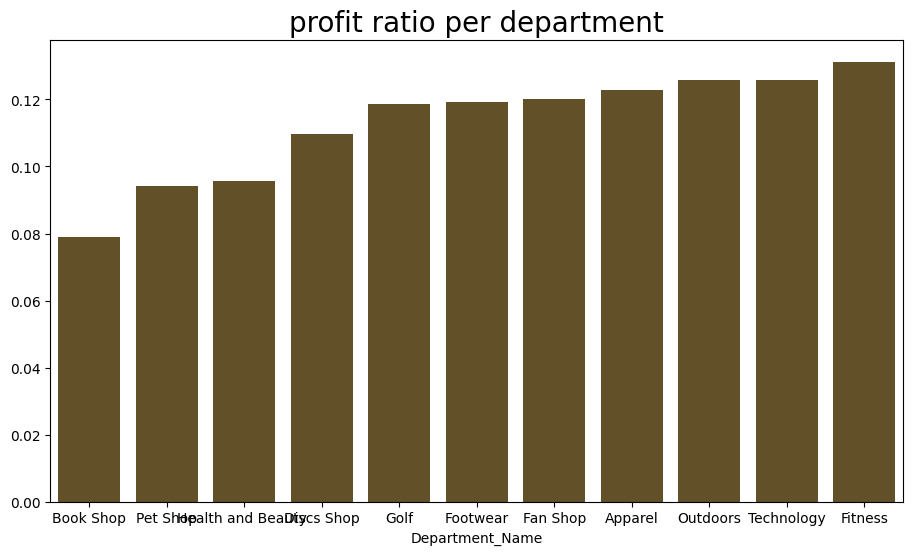

In [ ]:
bars(dep_profit_ratio.index,dep_profit_ratio.values,"#6c541e","profit ratio per department")


In [ ]:
bottom_25_products_profit_ratio = df.groupby("Product_Name").Order_Item_Profit_Ratio.mean().sort_values().head(30)
bottom_25_products_profit_ratio

Product_Name
SOLE E25 Elliptical                             -0.036000
SOLE E35 Elliptical                             -0.030000
Bushnell Pro X7 Jolt Slope Rangefinder          -0.024545
GoPro HERO3+ Black Edition Camera                0.015000
Diamondback Girls' Clarity 24 Hybrid Bike 201    0.037857
Garmin Forerunner 910XT GPS Watch                0.038571
Stiga Master Series ST3100 Competition Indoor    0.049259
Cleveland Golf Women's 588 RTX CB Satin Chrom    0.052143
Men's gala suit                                  0.052981
Polar Loop Activity Tracker                      0.060000
GolfBuddy VT3 GPS Watch                          0.061356
TaylorMade 2014 Purelite Stand Bag               0.063846
Nike Men's Free TR 5.0 TB Training Shoe          0.064853
ENO Atlas Hammock Straps                         0.074768
Sports Books                                     0.079062
Hirzl Men's Hybrid Golf Glove                    0.081170
Pelican Maverick 100X Kayak                      0.082750
C

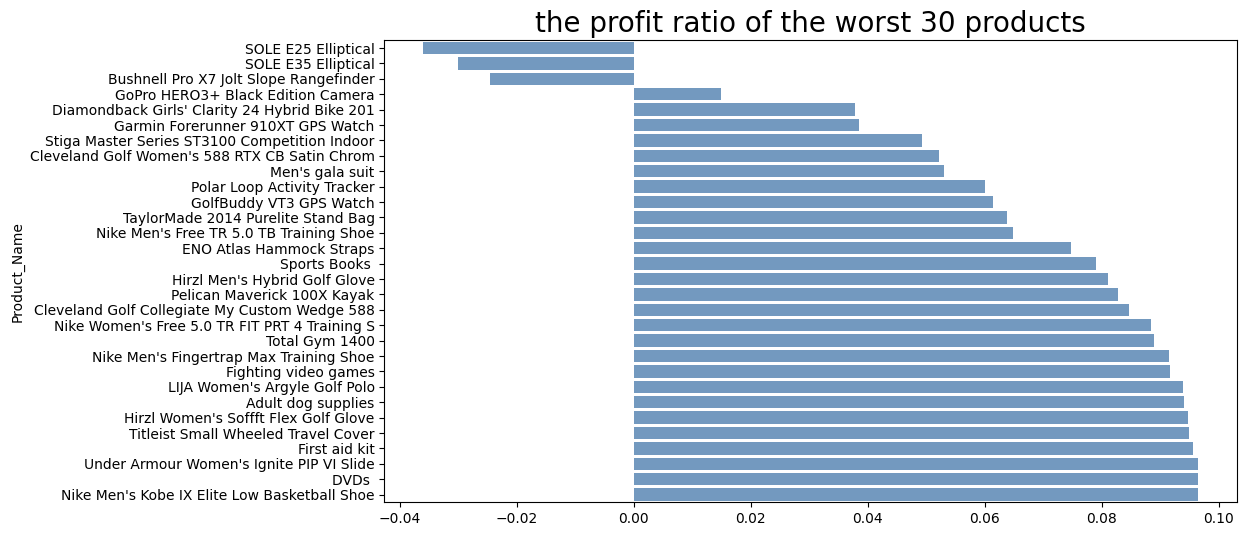

In [ ]:
bars( bottom_25_products_profit_ratio.values,bottom_25_products_profit_ratio.index,
     "#6699cc","the profit ratio of the worst 30 products")

there are 3 products which are making a loss over all the years in all the world. We are going to investigate about them.

# investigating about the 3 loss making products

In [ ]:
df_3_worst = df.query("Product_Name==['SOLE E35 Elliptical','SOLE E25 Elliptical','Bushnell Pro X7 Jolt Slope Rangefinder']& profit_or_lose =='lose'")
df_3_worst[["Delivery_Status","Category_Name","Customer_Country","Order_Country",'Order_Item_Discount_Rate',
        'Order_Item_Profit_Ratio', 'Order_Item_Total',
       'Order_Profit_Per_Order']].style.background_gradient(cmap ='afmhot')

,Delivery_Status,Category_Name,Customer_Country,Order_Country,Order_Item_Discount_Rate,Order_Item_Profit_Ratio,Order_Item_Total,Order_Profit_Per_Order
40634,Advance shipping,Kids' Golf Clubs,Puerto Rico,Alemania,0.050000,-0.830000,569.989990,-474.799988
63990,Late delivery,Strength Training,EE. UU.,Reino Unido,0.050000,-2.250000,1899.989990,-4274.979980
109710,Late delivery,Basketball,EE. UU.,Alemania,0.120000,-0.770000,879.989990,-674.950012
120715,Late delivery,Basketball,EE. UU.,Alemania,0.060000,-0.190000,944.989990,-177.660004
120716,Late delivery,Basketball,EE. UU.,Alemania,0.100000,-2.050000,899.989990,-1844.979980
122409,Late delivery,Kids' Golf Clubs,Puerto Rico,Francia,0.040000,-0.030000,575.989990,-16.700001
148406,Shipping on time,Strength Training,Puerto Rico,Italia,0.150000,-0.730000,1699.989990,-1246.089966
157562,Shipping canceled,Kids' Golf Clubs,Puerto Rico,Francia,0.020000,-1.500000,587.989990,-881.989990
159182,Advance shipping,Strength Training,Puerto Rico,Francia,0.160000,-0.570000,1679.989990,-952.559998


In [ ]:
top_25_products_profit_ratio = df.groupby("Product_Name").Order_Item_Profit_Ratio.mean().sort_values().tail(30)
top_25_products_profit_ratio

Product_Name
Nike Women's Legend V-Neck T-Shirt               0.139928
Titleist Club Glove Travel Cover                 0.140000
adidas Men's F10 Messi TRX FG Soccer Cleat       0.140000
Under Armour Women's Ignite Slide                0.141929
Merrell Women's Siren Mid Waterproof Hiking B    0.142429
Lawn mower                                       0.142521
Rock music                                       0.142650
Team Golf Texas Longhorns Putter Grip            0.145719
Titleist Pro V1x High Numbers Personalized Go    0.147614
Under Armour Hustle Storm Medium Duffle Bag      0.148495
Merrell Women's Grassbow Sport Waterproof Hik    0.149310
Summer dresses                                   0.151000
Titleist Pro V1 High Numbers Personalized Gol    0.152466
TaylorMade Women's RBZ SL Rescue                 0.155000
The North Face Women's Recon Backpack            0.155263
Team Golf Pittsburgh Steelers Putter Grip        0.155593
LIJA Women's Button Golf Dress                   0.156053
T

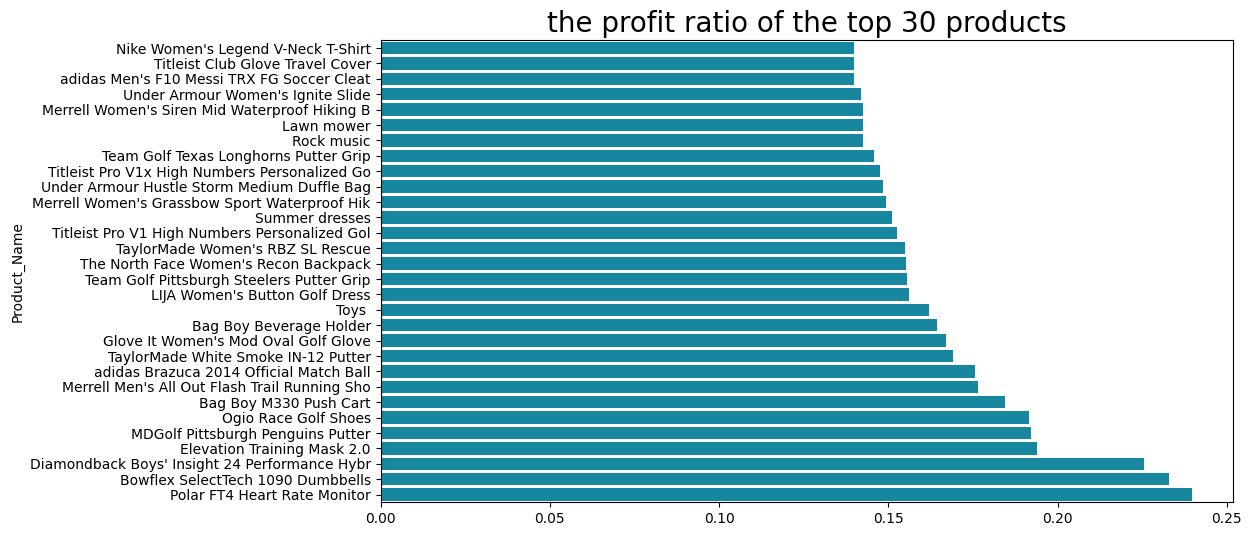

In [ ]:
bars(top_25_products_profit_ratio.values,top_25_products_profit_ratio.index,"#0095b6",
    "the profit ratio of the top 30 products")

# do discounts push the sales and the profit ?

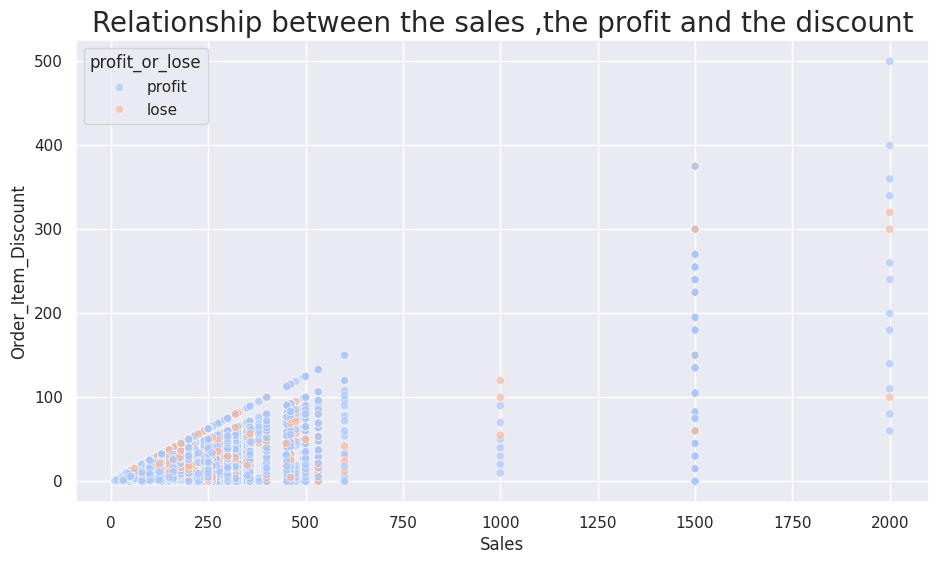

In [ ]:
sb.set(style="darkgrid")
sb.scatterplot( x= df.Sales , y = df.Order_Item_Discount, palette = "coolwarm",
               hue = df["profit_or_lose"],alpha= .7 )
plt.title("Relationship between the sales ,the profit and the discount",size = 20);

# (Business Question) do discounts are the reason that some orders are making a loss ?

In [ ]:
mean_disc_lose_orders = df.query("profit_or_lose == 'lose'").Order_Item_Discount_Rate.mean()
print ("mean of the discount of the making lose orders : ",mean_disc_lose_orders)

mean of the discount of the making lose orders :  0.1022223542650071


In [ ]:
mean_disc_profit_orders = df.query("profit_or_lose == 'profit'").Order_Item_Discount_Rate.mean()
print (" the mean of the discount of profit orders : ",mean_disc_profit_orders)

 the mean of the discount of profit orders :  0.10154060090484207


In [ ]:
obs_sample = mean_disc_lose_orders - mean_disc_profit_orders
print("the differance between the means : ",obs_sample)

the differance between the means :  0.00068175336016503


### H0 = mean of the discount of the making lose orders - the mean of the discount of  profit orders <=0
### H1 = mean of the discount of the making lose orders - the mean of the discount of  profit orders  > 0
### Alpha = 0.05

# Bootstraping

In [ ]:
means_diffs = []
for _ in range(10000):
    b_sample = df.sample(10000,replace= True)
    mean_disc_lose = b_sample.query("profit_or_lose == 'lose'").Order_Item_Discount_Rate.mean()
    mean_disc_profit = b_sample.query("profit_or_lose == 'profit'").Order_Item_Discount_Rate.mean()
    means_diffs.append(mean_disc_lose - mean_disc_profit)

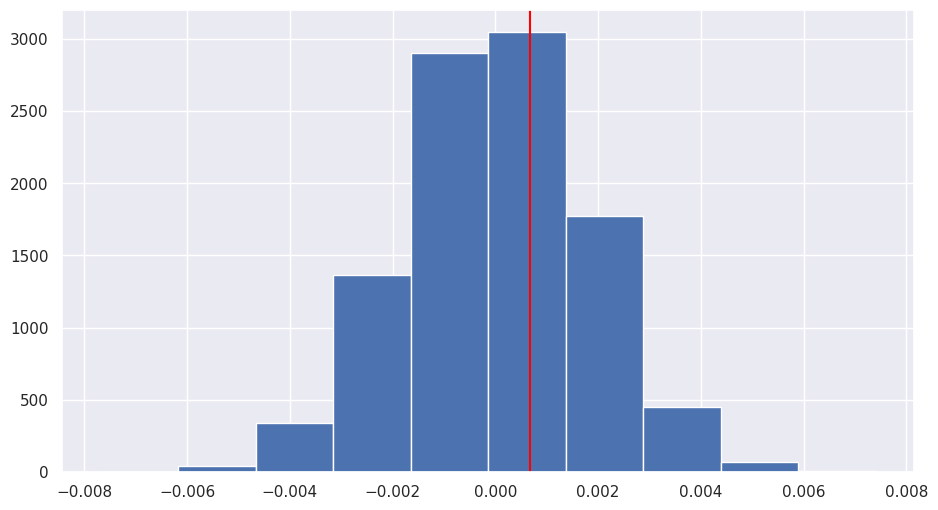

In [ ]:
means_diffs_std = np.std(means_diffs)
null_val = np.random.normal(0,means_diffs_std, len(means_diffs))
plt.hist(null_val)
plt.axvline(obs_sample, c = "Red");

In [ ]:
P_value = (null_val>obs_sample).mean()
print("P_value:" , P_value)

P_value: 0.3556


## We fail to reject the null hypothesis and there is no statistical evidence that discounts affect the the lose of the orders

## building the map plot to analize the prpfit of the orders around the world

In [ ]:
df_map = df.groupby("Order_Country").Order_Profit_Per_Order.sum().sort_values().reset_index()
df_map

,Order_Country,Order_Profit_Per_Order
0,Guinea-Bissau,-1448.720008
1,Taiwán,-1374.540018
2,Ruanda,-330.020066
3,Bosnia y Herzegovina,-327.380032
4,Mongolia,-286.229951
...,...,...
159,Brasil,186713.640355
160,Alemania,194827.080381
161,México,303278.370637
162,Francia,327828.580099


In [ ]:
#translate the column of the order country to English using googlr trans library
translator = Translator()
df_map["translated_Order_Country"] = df_map.Order_Country.apply(lambda x : translator.translate(x, dest='en').text )

In [ ]:
df_map

,Order_Country,Order_Profit_Per_Order,translated_Order_Country
0,Guinea-Bissau,-1448.720008,Guinea-Bissau
1,Taiwán,-1374.540018,Taiwan
2,Ruanda,-330.020066,Rwanda
3,Bosnia y Herzegovina,-327.380032,Bosnia y Herzegovina
4,Mongolia,-286.229951,Mongolia
...,...,...,...
159,Brasil,186713.640355,Brazil
160,Alemania,194827.080381,Germany
161,México,303278.370637,Mexico
162,Francia,327828.580099,France


In [ ]:
# function to modify the unknown names of the country after translation
def country_name_changer(name,newname):
    df_map["translated_Order_Country"]  = df_map["translated_Order_Country"].replace(name,newname)

In [ ]:
country_name_changer(["Bosnia y Herzegovina","Republic of Gambia","Belice","Occidental Sahara","Surinam","Butane","Republic of Congo","Sierra Leona","Botsana","Guadalupe","Moldavia","Swiss","Myanmar (Burmania)","Rumania","Irak","Democratic Republic of Congo","Filipinas","Türkiye","The Savior","Italia","Y i don’t mention","French Guayana","Barine","Tayikistan","CHIPP","Lesoto","Botana","Y i not mentioned","Kyrguistan","Finlandia","Myanmar (Birmania)","Space"],
                     ["Bosnia and Herzegovina","Gambia","Belize","Western Sahara","Suriname","Bhutan","Congo","Sierra Leone","Botswana","Guadeloupe","Moldova","Switzerland","Myanmar","Romania","Iraq","Congo","Philippines","Turkey","El Salvador","Italy","Djibouti","French Guiana","Bahrain","Tajikistan","Chile","Lesotho","Bhutan","Dominica","Kyrgyzstan","Finland","Myanmar","Switzerland"])


In [ ]:
#adding new column for the iso3 of the country using pycountry_convert library so that later plotly library can understand the country names
df_map["order_country_iso3"] = df_map['translated_Order_Country'].apply(lambda x:pc.country_name_to_country_alpha3(x,))

df_map

/usr/local/lib/python3.10/dist-packages/pycountry/db.py:51: UserWarning: Country's official_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)
/usr/local/lib/python3.10/dist-packages/pycountry/db.py:51: UserWarning: Country's common_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)


,Order_Country,Order_Profit_Per_Order,translated_Order_Country,order_country_iso3
0,Guinea-Bissau,-1448.720008,Guinea-Bissau,GNB
1,Taiwán,-1374.540018,Taiwan,TWN
2,Ruanda,-330.020066,Rwanda,RWA
3,Bosnia y Herzegovina,-327.380032,Bosnia and Herzegovina,BIH
4,Mongolia,-286.229951,Mongolia,MNG
...,...,...,...,...
159,Brasil,186713.640355,Brazil,BRA
160,Alemania,194827.080381,Germany,DEU
161,México,303278.370637,Mexico,MEX
162,Francia,327828.580099,France,FRA


In [ ]:
# Create choropleth map using Plotly
fig = px.choropleth(df_map, locations='order_country_iso3', color='Order_Profit_Per_Order',
                    hover_name='translated_Order_Country',projection='natural earth', title='Interactive mape of The total profit per country',
                   color_continuous_scale="magma_r")
fig.show()

From the map plot Its shown that the markets of USA , Mexico and France are the top profit making  

## (Business Question) Are the top 10 countries in sales the same top 10 countries in Profit ratio?

In [ ]:
Top_10_TotalProfit = df.groupby("Order_Country").Order_Profit_Per_Order.sum().sort_values().tail(10)
Top_10_TotalProfit

Order_Country
India              99746.819972
Italia            121545.470087
China             122190.920525
Australia         170041.580432
Reino Unido       180942.880424
Brasil            186713.640355
Alemania          194827.080381
México            303278.370637
Francia           327828.580099
Estados Unidos    540413.070422
Name: Order_Profit_Per_Order, dtype: float64

In [ ]:
list_of_10Top_sales = list(Top_10_TotalProfit.index)
list_of_10Top_sales

['India',
 'Italia',
 'China',
 'Australia',
 'Reino Unido',
 'Brasil',
 'Alemania',
 'México',
 'Francia',
 'Estados Unidos']

In [ ]:
df_10Top_sales = df[df.Order_Country.isin(list_of_10Top_sales)]
df_10Top_sales.head()

,Type,Days_for_shipping_(real),Days_for_shipment_(scheduled),Delivery_Status,Late_delivery_risk,Category_Name,Customer_City,Customer_Country,Customer_Fname,Customer_Id,...,Order_Item_Total,Order_Profit_Per_Order,Order_Region,Order_State,Order_Status,Product_Name,Product_Status,shipping_date_(DateOrders),Shipping_Mode,profit_or_lose
1,TRANSFER,5,4,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,Irene,19492,...,311.359985,-249.089996,South Asia,Rajastán,PENDING,Smart watch,0,2018-01-18 12:27:00,Standard Class,lose
2,CASH,4,4,Shipping on time,0,Sporting Goods,San Jose,EE. UU.,Gillian,19491,...,309.720001,-247.779999,South Asia,Rajastán,CLOSED,Smart watch,0,2018-01-17 12:06:00,Standard Class,lose
3,DEBIT,3,4,Advance shipping,0,Sporting Goods,Los Angeles,EE. UU.,Tana,19490,...,304.809998,22.860001,Oceania,Queensland,COMPLETE,Smart watch,0,2018-01-16 11:45:00,Standard Class,profit
4,PAYMENT,2,4,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,Orli,19489,...,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,Smart watch,0,2018-01-15 11:24:00,Standard Class,profit
5,TRANSFER,6,4,Shipping canceled,0,Sporting Goods,Tonawanda,EE. UU.,Kimberly,19488,...,294.980011,18.580000,Oceania,Queensland,CANCELED,Smart watch,0,2018-01-19 11:03:00,Standard Class,profit


In [ ]:
Top_10_TotalProfit_Ratio  = df_10Top_sales.groupby("Order_Country").Order_Item_Profit_Ratio.mean().sort_values()
Top_10_TotalProfit_Ratio

Order_Country
Alemania          0.112258
India             0.115011
Australia         0.115897
China             0.117094
Estados Unidos    0.121295
Italia            0.124179
Reino Unido       0.126760
Francia           0.128025
México            0.128434
Brasil            0.130316
Name: Order_Item_Profit_Ratio, dtype: float64

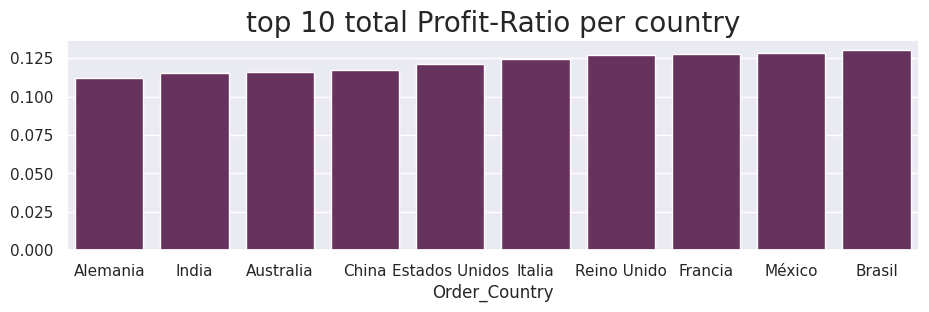

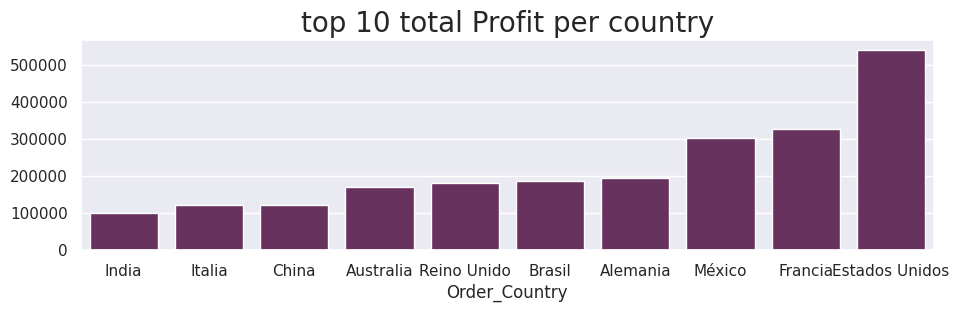

In [ ]:
plt.subplot(2, 1, 1)
bars(Top_10_TotalProfit_Ratio.index,Top_10_TotalProfit_Ratio.values,"#702963","top 10 total Profit-Ratio per country")
plt.subplot(2, 1, 2)
bars(Top_10_TotalProfit.index,Top_10_TotalProfit.values,"#702963","top 10 total Profit per country")

although the USA is the 1st rank and the biggest in total sales, Brazil has the best profit ratio among the top ten markets.

# Time analysis

In [ ]:
df['order_date_(DateOrders)'] = pd.to_datetime(df['order_date_(DateOrders)'])

In [ ]:
df['day'] =df['order_date_(DateOrders)'].dt.dayofweek

In [ ]:
df.day.replace([0,1,2,3,4,5,6],["monday","tuesday","wednesday","thursday","friday","saturday","sunday"],inplace=True)

In [ ]:
df.head()

,Type,Days_for_shipping_(real),Days_for_shipment_(scheduled),Delivery_Status,Late_delivery_risk,Category_Name,Customer_City,Customer_Country,Customer_Fname,Customer_Id,...,Order_Profit_Per_Order,Order_Region,Order_State,Order_Status,Product_Name,Product_Status,shipping_date_(DateOrders),Shipping_Mode,profit_or_lose,day
0,DEBIT,3,4,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,Cally,20755,...,91.250000,Southeast Asia,Java Occidental,COMPLETE,Smart watch,0,2018-02-03 22:56:00,Standard Class,profit,wednesday
1,TRANSFER,5,4,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,Irene,19492,...,-249.089996,South Asia,Rajastán,PENDING,Smart watch,0,2018-01-18 12:27:00,Standard Class,lose,saturday
2,CASH,4,4,Shipping on time,0,Sporting Goods,San Jose,EE. UU.,Gillian,19491,...,-247.779999,South Asia,Rajastán,CLOSED,Smart watch,0,2018-01-17 12:06:00,Standard Class,lose,saturday
3,DEBIT,3,4,Advance shipping,0,Sporting Goods,Los Angeles,EE. UU.,Tana,19490,...,22.860001,Oceania,Queensland,COMPLETE,Smart watch,0,2018-01-16 11:45:00,Standard Class,profit,saturday
4,PAYMENT,2,4,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,Orli,19489,...,134.210007,Oceania,Queensland,PENDING_PAYMENT,Smart watch,0,2018-01-15 11:24:00,Standard Class,profit,saturday


<ipython-input-14-953916727a17>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




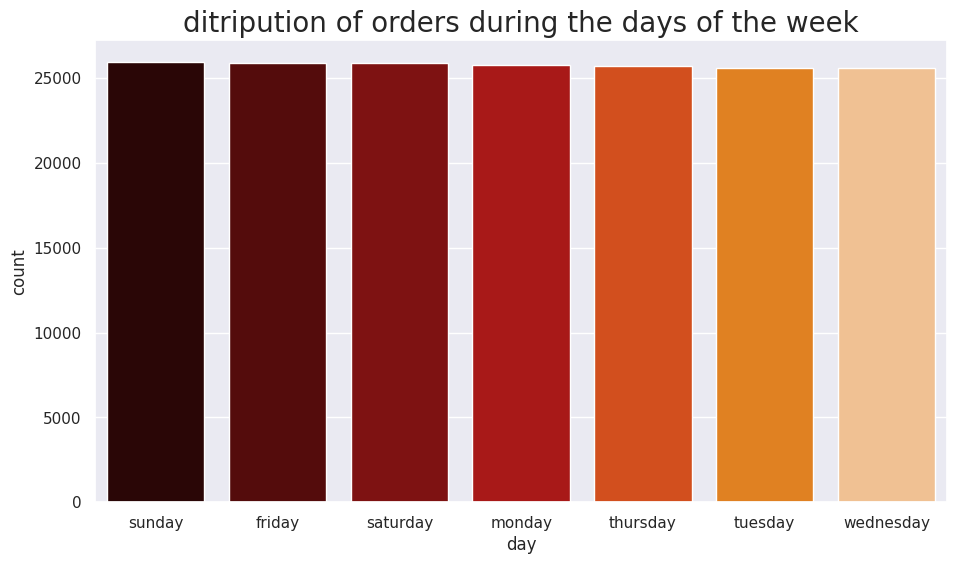

In [ ]:

categ_count_x("day","ditripution of orders during the days of the week")

It's uniform distribution and days has no clear impact on the orders

In [ ]:
Late_delivery_risk_indays_of_the_weak = df.groupby("day").Late_delivery_risk.mean().sort_values()
Late_delivery_risk_indays_of_the_weak

day
tuesday      0.543010
saturday     0.543956
wednesday    0.547583
thursday     0.550054
monday       0.550531
sunday       0.551145
friday       0.551707
Name: Late_delivery_risk, dtype: float64

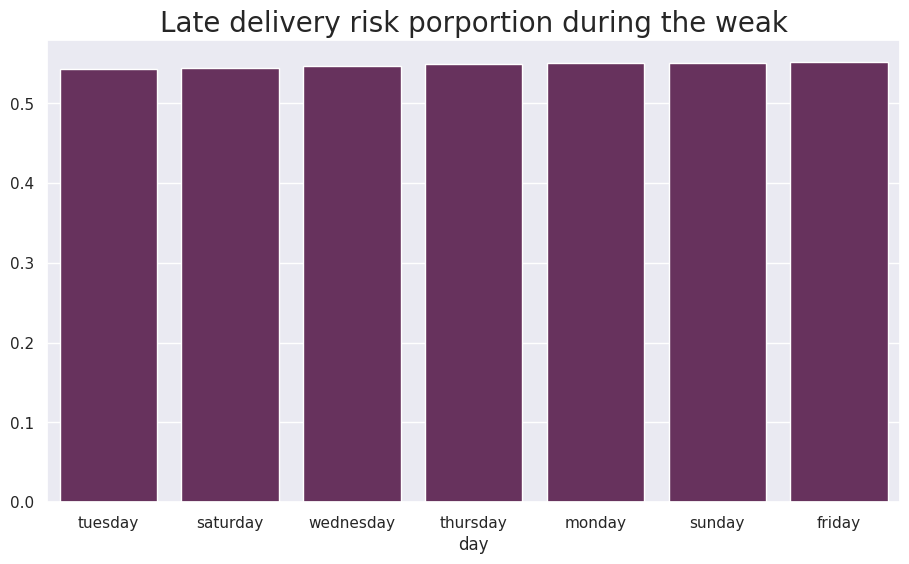

In [ ]:
bars(Late_delivery_risk_indays_of_the_weak.index,Late_delivery_risk_indays_of_the_weak.values,"#702963","Late delivery risk porportion during the weak")

 days of the week has no clear impact on the orders however Friday order has a little more likely risk of delay  

In [ ]:
df['month'] =df['order_date_(DateOrders)'].dt.month
df["year"] = df['order_date_(DateOrders)'].dt.year

In [ ]:
df["year"].value_counts()

2015    62650
2016    62550
2017    53196
2018     2123
Name: year, dtype: int64

In [ ]:
 df['order_date_(DateOrders)'].max()

Timestamp('2018-01-31 23:38:00')

In [ ]:
df_without_2018 = df.query("year == 2015 or year == 2016 or year == 2017")
df_without_2018['order_date_(DateOrders)'].max()


Timestamp('2017-12-31 23:52:00')

<ipython-input-61-6dbbda7309ca>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




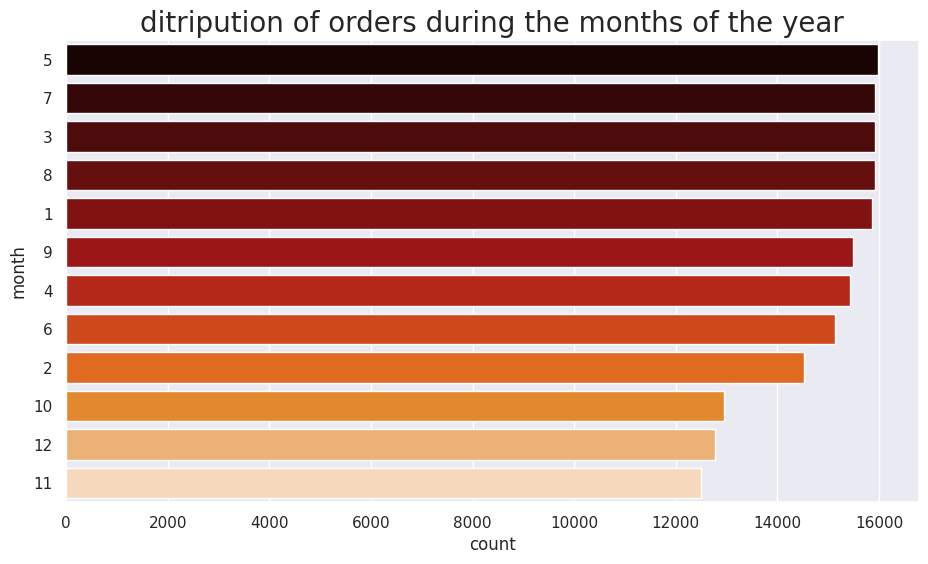

In [ ]:
sb.countplot(y = df_without_2018['month'],order= df_without_2018['month'].value_counts().index, palette='gist_heat')
plt.title("ditripution of orders during the months of the year", size = 20)
plt.show()

orders of the summer and spring months are more frequently

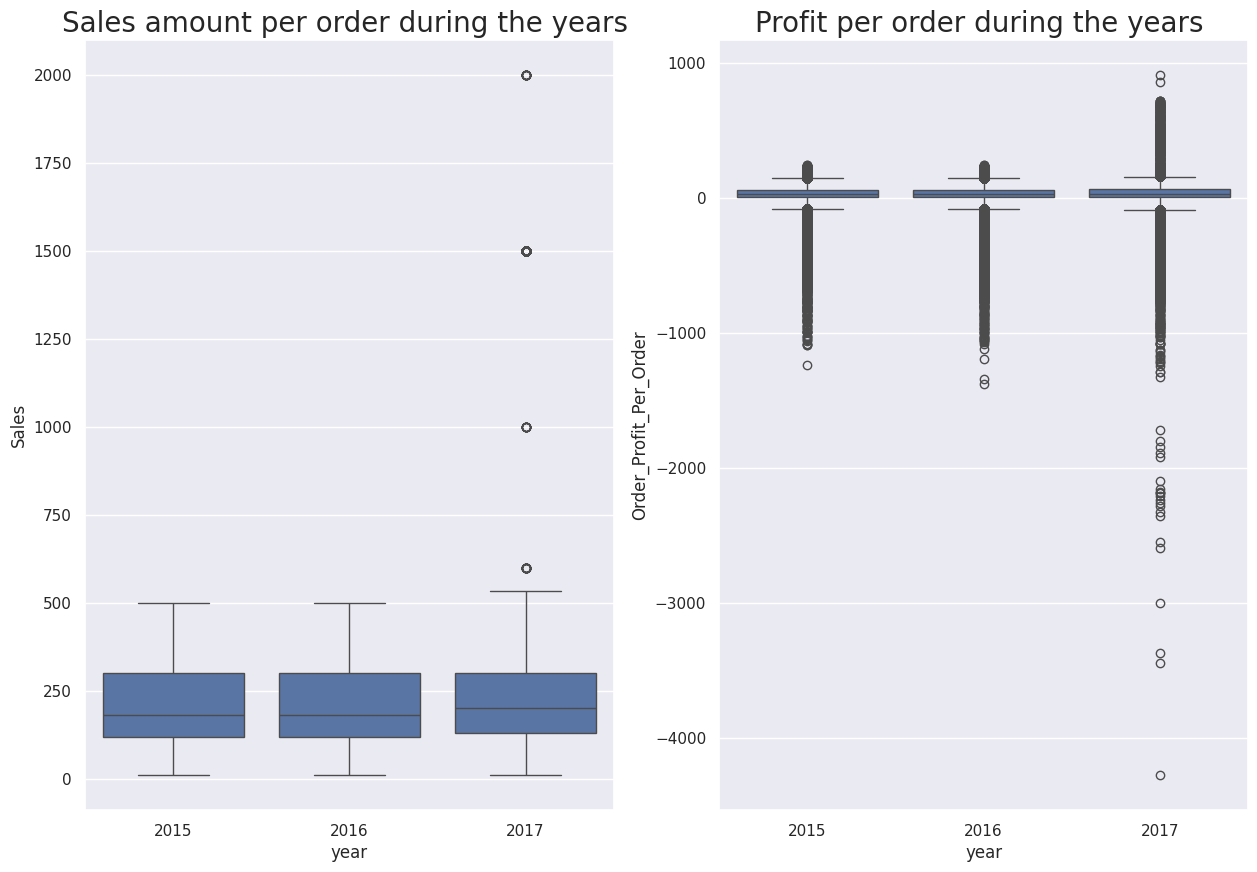

In [ ]:
plt.figure(figsize = [15,10])
plt.subplot(1, 2, 1)
sb.boxplot(data = df_without_2018, x = "year" , y = "Sales")
plt.title("Sales amount per order during the years ", size = 20)
plt.subplot(1, 2, 2)
sb.boxplot(data = df_without_2018, x = "year" , y = "Order_Profit_Per_Order")
plt.title("Profit per order during the years ", size = 20);

in 2017 a lot of clear outliers in sales and profit as well

In [ ]:
def line(x,y,column_data,title):
    sb.lineplot(x = x ,y = y,data = df_without_2018.groupby("year")[column_data].sum().reset_index(), ci = None )
    plt.title(title, size = 20)

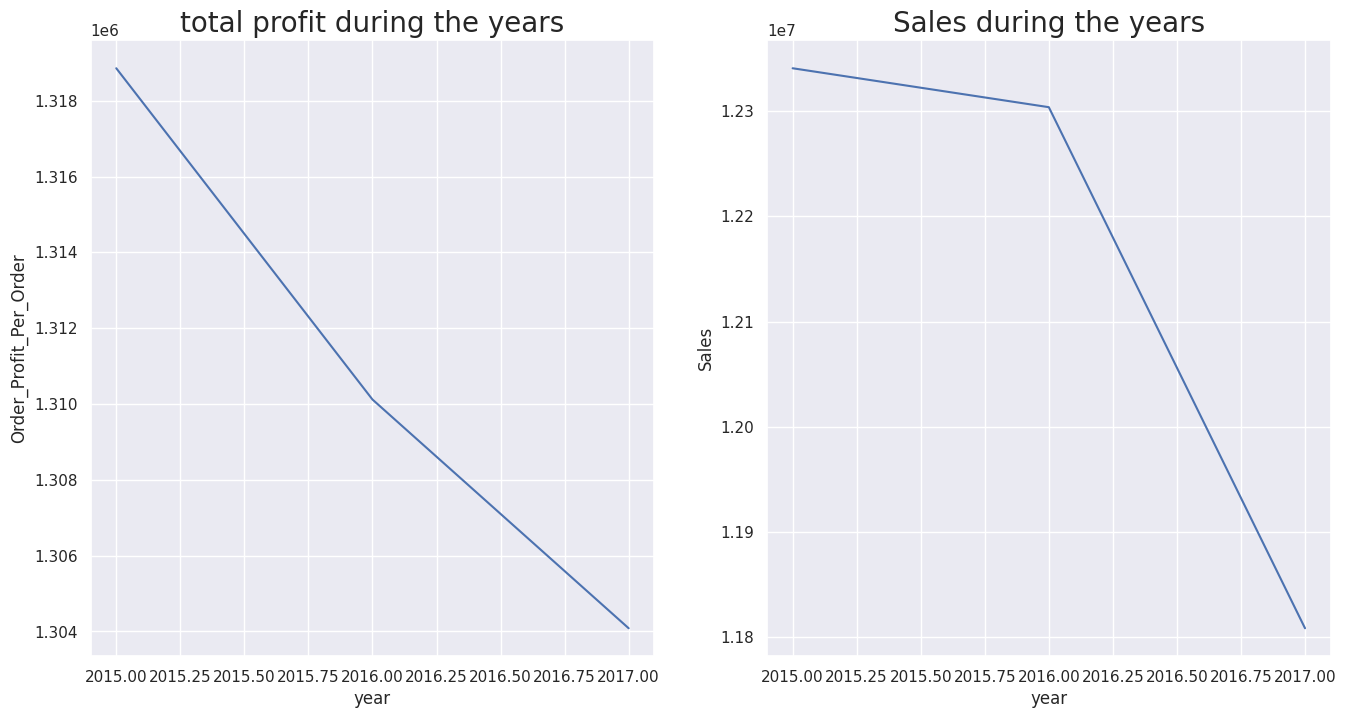

In [ ]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize = [16,8])
plt.subplot(1, 2, 1)
line("year","Order_Profit_Per_Order","Order_Profit_Per_Order","total profit during the years")
plt.subplot(1, 2, 2)
line("year","Sales","Sales","Sales during the years")

It's so clear that progress in sales and profit is negative during the 3 years of the available data

# flow of the orders from Customer's Country to the Regions of the world where are delivered

In [ ]:
df_unique_orders = df.drop_duplicates(subset=['Order_Id'])
df_unique_orders_flow =  df_unique_orders.groupby(["Customer_Country","Order_Region"]).Order_Id.count().reset_index()
df_unique_orders_flow.columns = ["Customer_Country","Order_Region","the count of unique orders"]
df_unique_orders_flow.head()

,Customer_Country,Order_Region,the count of unique orders
0,EE. UU.,Canada,177
1,EE. UU.,Caribbean,1693
2,EE. UU.,Central Africa,332
3,EE. UU.,Central America,5772
4,EE. UU.,Central Asia,121


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
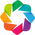

:Sankey   [Customer_Country,Order_Region]   (the count of unique orders)

In [ ]:
hv.extension("bokeh")
sankey_diag = hv.Sankey(df_unique_orders_flow)
sankey_diag.opts(cmap='prism',edge_color='Customer_Country',edge_line_width=0,node_alpha=0.5,
                 node_width=40,width=800, height=700, bgcolor="snow",
                 title="The Sankey flow of the orders from Customer's Country to the Regions of the world where are delivered ")

In [ ]:
loss_df = df.query("profit_or_lose == 'lose'")

loss_df_flow = loss_df.groupby(["Customer_Country","Order_Region"]).Order_Profit_Per_Order.mean().reset_index()
loss_df_flow.columns =  ["Customer_Country","Order_Region","average lose per order"]
loss_df_flow["average lose per order"] = loss_df_flow["average lose per order"].apply(lambda x:round(x)*-1)
loss_df_flow.head()

,Customer_Country,Order_Region,average lose per order
0,EE. UU.,Canada,103
1,EE. UU.,Caribbean,109
2,EE. UU.,Central Africa,113
3,EE. UU.,Central America,114
4,EE. UU.,Central Asia,108


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
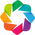

:Sankey   [Customer_Country,Order_Region]   (average lose per order)

In [ ]:
hv.extension("bokeh")
sankey_diag = hv.Sankey(loss_df_flow)
sankey_diag.opts(cmap='Dark2',edge_color='Customer_Country',edge_line_width=0,node_alpha=0.5,
                 node_width=40,width=800, height=700, bgcolor="snow",
                 title="average lose per order from Customer's Country to the Regions of the world where are delivered")

In [ ]:
profit_df = df.query("profit_or_lose == 'profit'")
profit_df_flow = profit_df.groupby(["Customer_Country","Order_Region"]).Order_Profit_Per_Order.mean().reset_index()
profit_df_flow.columns =  ["Customer_Country","Order_Region","average profit per order"]
profit_df_flow["average profit per order"] = profit_df_flow["average profit per order"].apply(lambda x:round(x))
profit_df_flow.head()

,Customer_Country,Order_Region,average profit per order
0,EE. UU.,Canada,51
1,EE. UU.,Caribbean,53
2,EE. UU.,Central Africa,52
3,EE. UU.,Central America,53
4,EE. UU.,Central Asia,50


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
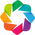

:Sankey   [Customer_Country,Order_Region]   (average profit per order)

In [ ]:
hv.extension("bokeh")
sankey_diag = hv.Sankey(profit_df_flow)
sankey_diag.opts(cmap='Dark2',edge_color='Customer_Country',edge_line_width=0,node_alpha=0.5,
                 node_width=40,width=800, height=700, bgcolor="snow",
                 title="average profit per order from Customer's Country to the Regions of the world where are delivered")

# the conclusion the sankey diagrams
from the previous 2 Sankey diagrams, We can better understand the shipping between the customer country and the markets around the world where the orders are delivered. we tracked the flow of the orders from the source to the market and calculated the average profit per order for the products that made a profit and the average loss of the orders that made a loss
then we could give a better approach to the stakeholders for optimizing the supply chain
for instance when we trach the profit average of the order where shipping from the USA to the Caribbean market is 53 per order and the profit average of the order where shipping from Puerto Rico to the Caribbean market is 51 per order, on the other hand, the average loss was 109 from USA to Caribbean market and the lose was 124 on average for orders from Puerto Rico to the Caribbean market. Then We can advise the stakeholders to study increasing the shipping from the USA to the Caribbean and reduce it from Puerto Rico.